In [1]:
import cvxpy as cp
import numpy as np
import osbdo as ob

# Create parameters

In [2]:
params = ob.ics_params(num_row=200, num_col=300, num_agents=20)

# Distributed solution with limited memory $m$

In [3]:
agents = ob.ics_agents(params)
g = ob.ics_coupling(agents, params)
prob = ob.Problem(agents = agents, g = g)

In [4]:
max_iter = 30
memory = [10, 20, max_iter]
memory_bounds = {}
for m in memory:
    prob.solve(rel_gap=10**(-5), abs_gap=10**(-5), max_iter=max_iter, memory=m)
    memory_bounds[m] = {'uk':prob.upper_bnd, 'lk':prob.lower_bnd}

k=0, rel_gap=inf, L=0.0, U=8.085690313443152
k=1, rel_gap=inf, L=0.0, U=8.085690313443152
k=2, rel_gap=inf, L=0.0, U=4.636525835466449
k=3, rel_gap=inf, L=0.0, U=2.6749726366036084
k=4, rel_gap=inf, L=0.0, U=1.5446902738061632
k=5, rel_gap=inf, L=0.0, U=0.892158607646112
k=6, rel_gap=inf, L=0.0, U=0.5140564588802256
k=7, rel_gap=inf, L=0.0, U=0.2949145294033265
k=8, rel_gap=inf, L=0.0, U=0.16858314980062458
k=9, rel_gap=inf, L=0.0, U=0.09615244837563382
k=10, rel_gap=inf, L=0.0, U=0.054680800789434915
k=11, rel_gap=inf, L=0.0, U=0.030991158204522033
k=12, rel_gap=inf, L=0.0, U=0.017516079587503248
k=13, rel_gap=inf, L=0.0, U=0.009884168757718522
k=14, rel_gap=inf, L=0.0, U=0.0055722678282083575
k=15, rel_gap=inf, L=0.0, U=0.0031420822161743896
k=16, rel_gap=inf, L=0.0, U=0.001771470034091428
k=17, rel_gap=inf, L=0.0, U=0.0009979584026169205
k=18, rel_gap=inf, L=0.0, U=0.0005620040136891585
k=19, rel_gap=inf, L=0.0, U=0.0003163889429829477
k=20, rel_gap=inf, L=0.0, U=0.00017805760262272

# Centralized solution

In [5]:
h_cvx = ob.cvx_intersection_cvx_sets(params=params)[2]

# Plot

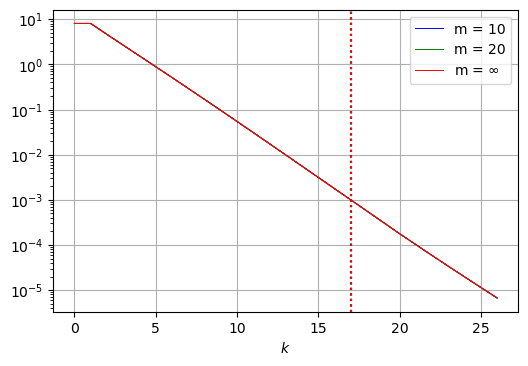

In [6]:
ob.plot_finite_memory_abs(memory_bounds=memory_bounds, memory=memory, h_true=h_cvx)